### Training model

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

from app_runner import Wrappers

Using TensorFlow backend


In [2]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)


In [3]:
# x_train as pandas.DataFrame, y_train as pandas.Series
x_train = pd.read_csv(train_file_path)
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("survived")
print(type(y_train))  # pandas.Series


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [4]:
feature_type = {}
for feature in x_train.columns:
    if x_train[feature].dtype == 'int64' or x_train[feature].dtype == 'float64':
        feature_type[feature] = 'numerical'
    else:
        feature_type[feature] = 'categorical'

feature_type

{'sex': 'categorical',
 'age': 'numerical',
 'n_siblings_spouses': 'numerical',
 'parch': 'numerical',
 'fare': 'numerical',
 'class': 'categorical',
 'deck': 'categorical',
 'embark_town': 'categorical',
 'alone': 'categorical'}

In [5]:
cls_obj = Wrappers(debug=True)

In [8]:
cls_obj.StructuredDataClassifier(overwrite=True, max_trials=5, column_names = list(x_train.columns), column_types = feature_type, num_classes = 2)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
history = cls_obj.sdc_fit(
    x = train_file_path,
    y = "survived",
    evaluation = test_file_path, 
    epochs=10, 
    callbacks=[tensorboard_callback]
)

INFO:tensorflow:Oracle triggered exit
Epoch 1/10
20/20 [==============================] - 2s 6ms/step - loss: 0.7462 - accuracy: 0.5088
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.6332
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5860 - accuracy: 0.7352
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5381 - accuracy: 0.7624
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5154 - accuracy: 0.7815
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.7831
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.7911
Epoch 8/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4622 - accuracy: 0.8070
Epoch 9/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.8054
Epoch 10/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4680 

In [14]:
df = pd.read_csv(train_file_path)


In [26]:
import pandas as pd
import plotly.express as px

# Load the Titanic dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with your dataset file name


# Create separate histograms for each column
for column in df.columns:
    fig = px.histogram(df, x=column, title=f'Data Distribution of {column}')
    fig.update_layout(height=400, width=400)
    fig.show()


In [31]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path to the directory containing TensorFlow event files (usually the log directory)
log_dir = 'logs'

# Load event files
event_acc = EventAccumulator(log_dir)
event_acc.Reload()

# Get the list of available tags/metrics
tags = event_acc.Tags()

# Extract data for a specific tag (e.g., 'loss' or 'accuracy')
tag = 'accuracy'
data = event_acc.Scalars(tag)

# Access the data and create your custom plots using a library like Matplotlib or Plotly
import matplotlib.pyplot as plt

steps = [scalar.step for scalar in data]
values = [scalar.value for scalar in data]

plt.plot(steps, values)
plt.xlabel('Steps')
plt.ylabel(tag)
plt.title(f'Custom Plot for {tag}')
plt.show()


{'images': [], 'audio': [], 'histograms': [], 'scalars': [], 'distributions': [], 'tensors': ['keras', 'epoch_loss', 'epoch_accuracy'], 'graph': True, 'meta_graph': False, 'run_metadata': []}


In [32]:
import pyqtgraph as pg
from pyqtgraph.Qt import QtGui

# Create an application instance
app = QtGui.QApplication.instance()
if app is None:
    app = QtGui.QApplication([])

# Create a plot
win = pg.GraphicsLayoutWidget()
p = win.addPlot(title='Simple Plot')
x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 6, 7]
p.plot(x, y, pen='r')  # 'r' for red color

# Save the plot as an image

img = pg.makeQImage(win.getViewWidget())
img.save('plot_image.png')


AttributeError: module 'pyqtgraph.Qt.QtGui' has no attribute 'QApplication'

In [10]:
import plotly.express as px
import pandas as pd

# Load your Titanic dataset into a pandas DataFrame
# Replace this with your actual Titanic dataset
# For example, assuming 'df' is your DataFrame containing the Titanic dataset

# Sample DataFrame (you can replace this with your actual dataset)
data = {
    'Survived': [0, 1, 1, 1, 0],
    'Pclass': [3, 1, 3, 1, 3],
    'Name': ['Mr. A', 'Mrs. B', 'Miss C', 'Mrs. D', 'Mr. E'],
    'Sex': ['male', 'female', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35, 35],
    'Fare': [7.25, 71.28, 7.92, 53.1, 8.05]
}
df = pd.DataFrame(data)

# Create histograms for numerical columns (Age, Fare)
fig = px.histogram(df, x='Age', title='Distribution of Age in Titanic Dataset')
fig.show()

fig = px.histogram(df, x='Fare', title='Distribution of Fare in Titanic Dataset')
fig.show()


In [8]:
from ipycytoscape import CytoscapeWidget

# Sample flowchart data
flowchart_elements = [
    {'data': {'id': 'start', 'label': 'Start'}},
    {'data': {'id': 'step1', 'label': 'Step 1'}},
    {'data': {'id': 'step2', 'label': 'Step 2'}},
    {'data': {'id': 'end', 'label': 'End'}},
    {'data': {'source': 'start', 'target': 'step1'}},
    {'data': {'source': 'step1', 'target': 'step2'}},
    {'data': {'source': 'step2', 'target': 'end'}},
    {'data': {'source': 'end', 'target': 'start'}}  # Optional loop back to the start
]

# Create a Cytoscape widget and set elements
cytoscape = CytoscapeWidget()
cytoscape.graph.add_graph_from_json(flowchart_elements)

# Set layout options (optional)
cytoscape.set_layout(name='dagre', animate=False)

# Show the flowchart
cytoscape


TypeError: list indices must be integers or slices, not str

In [20]:
import networkx as nx
import json

# Create a directed graph representing the flowchart
flowchart = nx.DiGraph()

# Adding nodes to the flowchart with 'x' and 'y' attributes
positions = {
    "Start": {"x": 50, "y": 50},
    "Step 1": {"x": 150, "y": 50},
    "Step 2": {"x": 250, "y": 50},
    "End": {"x": 350, "y": 50}
}

for node, pos in positions.items():
    flowchart.add_node(node, x=pos["x"], y=pos["y"], label=node)

# Adding edges to represent the flow
flowchart.add_edge("Start", "Step 1")
flowchart.add_edge("Step 1", "Step 2")
flowchart.add_edge("Step 2", "End")
flowchart.add_edge("End", "Start")  # Optional loop back to the start

# Convert the graph to a format that can be serialized (e.g., JSON)
flowchart_data = nx.node_link_data(flowchart)

# Serialize the flowchart data to a JSON file
with open('flowchart.json', 'w') as file:
    json.dump(flowchart_data, file)


In [19]:
from ipycytoscape import CytoscapeWidget

# Load the saved flowchart data from the JSON file
with open('flowchart.json', 'r') as file:
    flowchart_data = json.load(file)

# Create a Cytoscape widget and set elements from the flowchart data
cytoscape_flowchart = CytoscapeWidget()
cytoscape_flowchart.graph.add_graph_from_json(flowchart_data)

# Set layout options (optional)
cytoscape_flowchart.set_layout(name='dagre', animate=True)

# Display the flowchart
cytoscape_flowchart


CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'animate': True}, cytoscape_style=[{'selector': 'node', 'cs…

c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


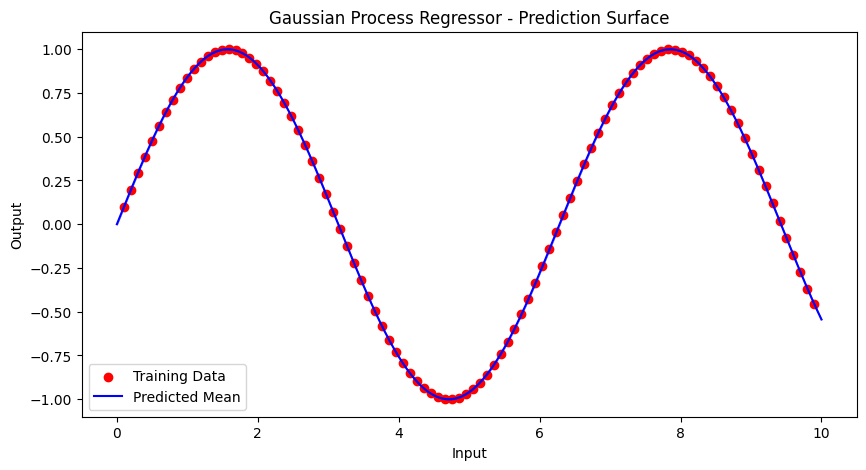

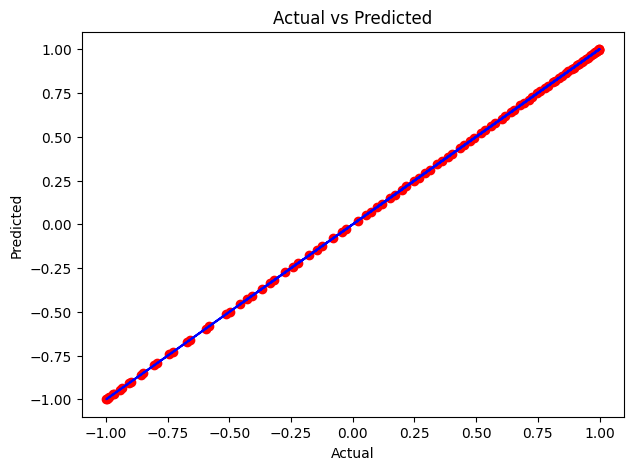

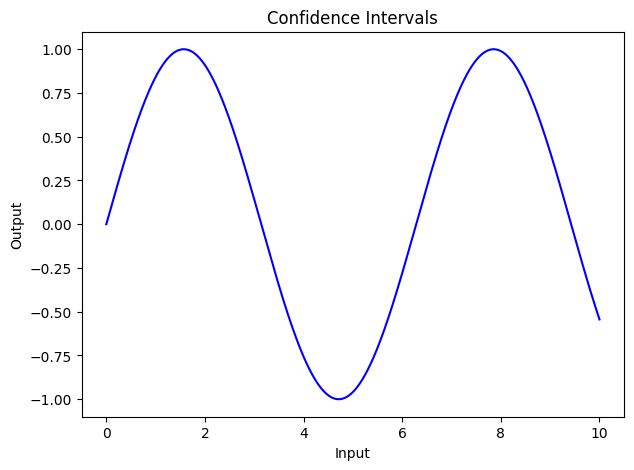

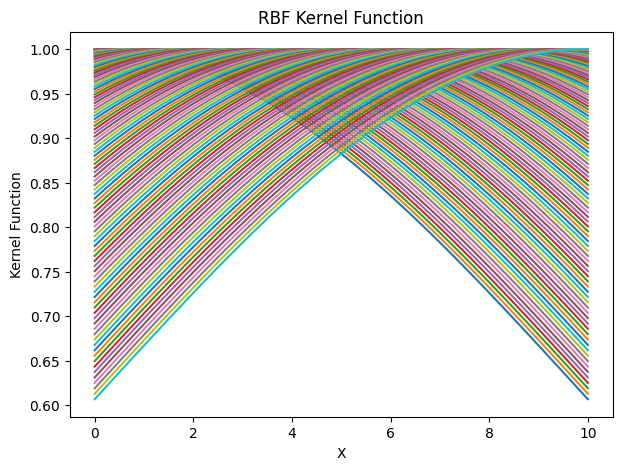

In [3]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(0)
X = np.linspace(0.1, 9.9, 100).reshape(-1, 1)
y = np.sin(X).ravel()

# Fit the GPR
kernel = C(1.0, (1e-3, 1e3)) * RBF(10.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpr.fit(X, y)

# Predictions
x_pred = np.linspace(0, 10, 1000)[:, np.newaxis]
y_pred, sigma = gpr.predict(x_pred, return_std=True)

# Visualization 1: Prediction Surface Plot
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='red', label='Training Data')
plt.plot(x_pred, y_pred, label='Predicted Mean', color='blue')
plt.fill_between(x_pred[:, 0], y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.3, color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Gaussian Process Regressor - Prediction Surface')
plt.legend()
plt.show()

# Visualization 2: Actual vs Predicted Plot
plt.figure(figsize=(7, 5))
plt.scatter(y, gpr.predict(X), color='red')
plt.plot(y, y, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Visualization 3: Confidence Intervals
plt.figure(figsize=(7, 5))
plt.fill_between(x_pred[:, 0], y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.3)
plt.plot(x_pred, y_pred, color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Confidence Intervals')
plt.show()

# Visualization 4: Kernel Plot (Single Kernel)
x_kernel = np.linspace(0, 10, 100)
plt.figure(figsize=(7, 5))
plt.plot(x_kernel, kernel(x_kernel.reshape(-1, 1)))
plt.xlabel('X')
plt.ylabel('Kernel Function')
plt.title('RBF Kernel Function')
plt.show()


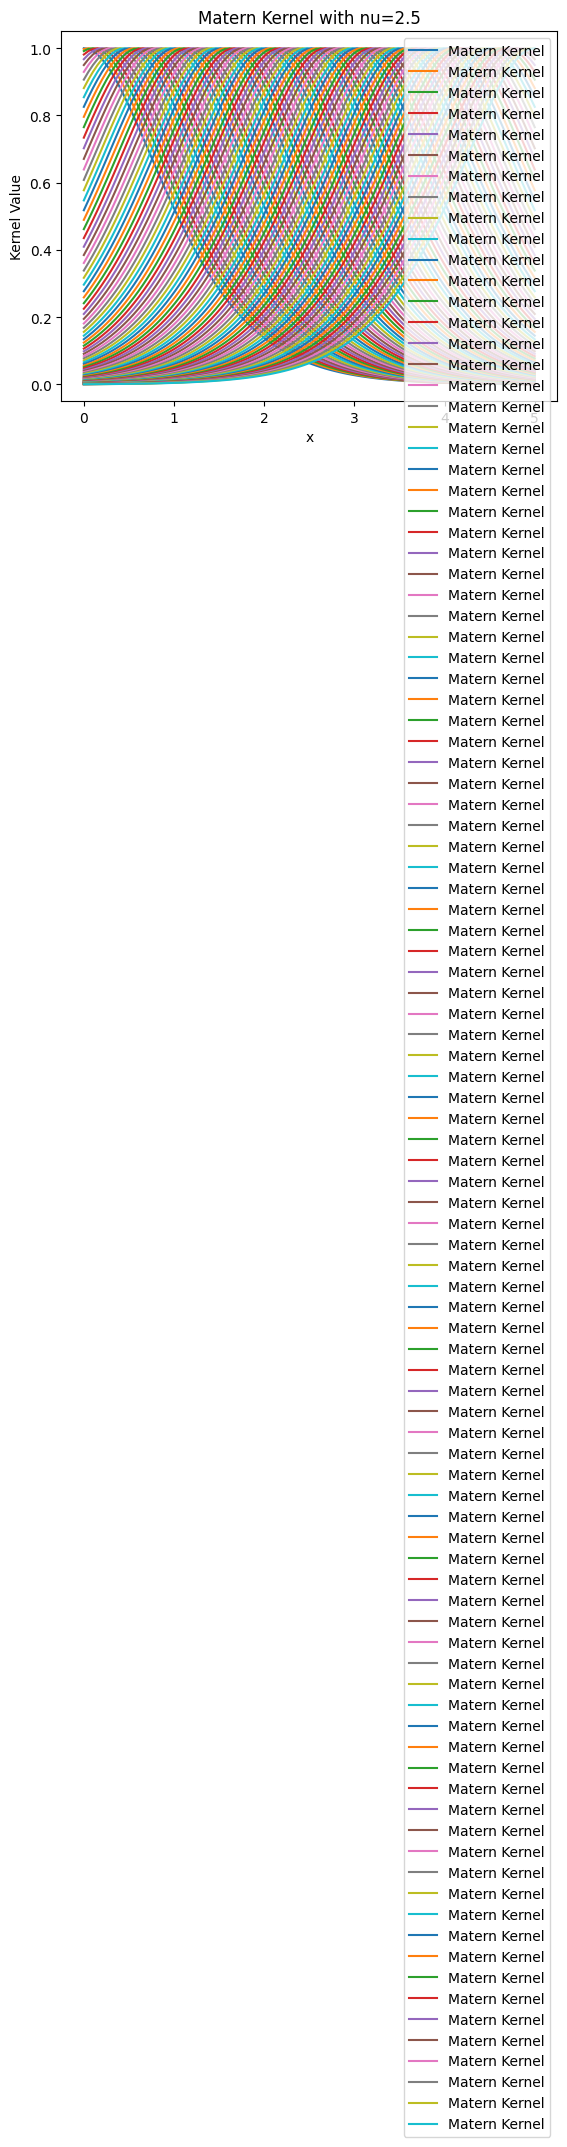

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Matern

x = np.linspace(0, 5, 100)
kernel = Matern(length_scale=1.0, nu=2.5)

# Compute the kernel values
K = kernel(np.expand_dims(x, 1))

plt.plot(x, K, label='Matern Kernel')
plt.xlabel('x')
plt.ylabel('Kernel Value')
plt.title('Matern Kernel with nu=2.5')
plt.legend()
plt.show()


In [11]:
import json
json_file_path = "structured_data_classifier/decision_factors_1698257995198.json"
try:
    # Open the JSON file for reading
    with open(json_file_path, "r") as json_file:
        # Load the JSON data from the file
        data = json.load(json_file)

    # Now 'data' contains the contents of the JSON file
    print(data)

except FileNotFoundError:
    print(f"File not found: {json_file_path}")

except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")


{'trial_id': '1', 'trie_json': {'num_leaves': 9, 'hp_name': None, 'children': {'structured_data_block_1': {'num_leaves': 6, 'hp_name': None, 'children': {'normalize': {'num_leaves': 1, 'hp_name': 'structured_data_block_1/normalize', 'children': {}}, 'dense_block_1': {'num_leaves': 5, 'hp_name': None, 'children': {'use_batchnorm': {'num_leaves': 1, 'hp_name': 'structured_data_block_1/dense_block_1/use_batchnorm', 'children': {}}, 'num_layers': {'num_leaves': 1, 'hp_name': 'structured_data_block_1/dense_block_1/num_layers', 'children': {}}, 'units_0': {'num_leaves': 1, 'hp_name': 'structured_data_block_1/dense_block_1/units_0', 'children': {}}, 'dropout': {'num_leaves': 1, 'hp_name': 'structured_data_block_1/dense_block_1/dropout', 'children': {}}, 'units_1': {'num_leaves': 1, 'hp_name': 'structured_data_block_1/dense_block_1/units_1', 'children': {}}}}}}, 'classification_head_1': {'num_leaves': 1, 'hp_name': None, 'children': {'dropout': {'num_leaves': 1, 'hp_name': 'classification_head

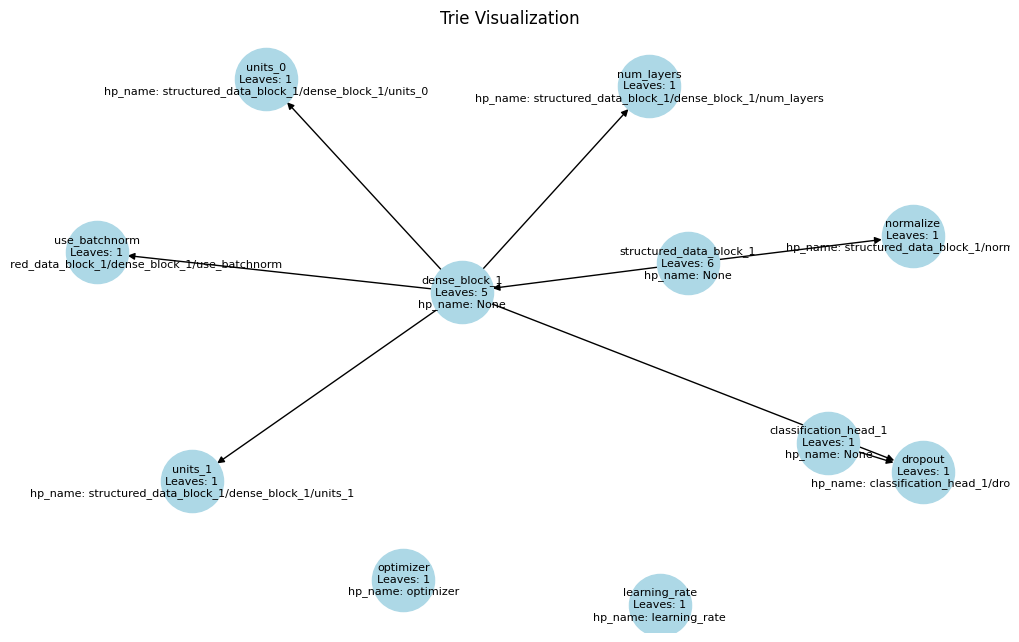

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load the Trie JSON data from the file
json_file_path = "structured_data_classifier\decision_factors_1698257995198.json"

try:
    with open(json_file_path, "r") as json_file:
        trie_data = json.load(json_file)['trie_json']

    # Function to add nodes and edges to the graph
    def add_nodes(graph, node_data, parent=None):
        for key, value in node_data['children'].items():
            graph.add_node(key, num_leaves=value['num_leaves'], hp_name=value['hp_name'])
            if parent is not None:
                graph.add_edge(parent, key)
            add_nodes(graph, value, key)

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    add_nodes(G, trie_data)

    # Define node positions (this is optional but can help layout the tree)
    pos = nx.spring_layout(G, seed=42)

    # Draw the tree
    plt.figure(figsize=(10, 6))
    labels = {node: f"{node}\nLeaves: {data['num_leaves']}\nhp_name: {data['hp_name']}" for node, data in G.nodes(data=True)}
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="lightblue", font_size=8, font_color="black")
    plt.title("Trie Visualization")
    plt.show()

except FileNotFoundError:
    print(f"File not found: {json_file_path}")

except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")


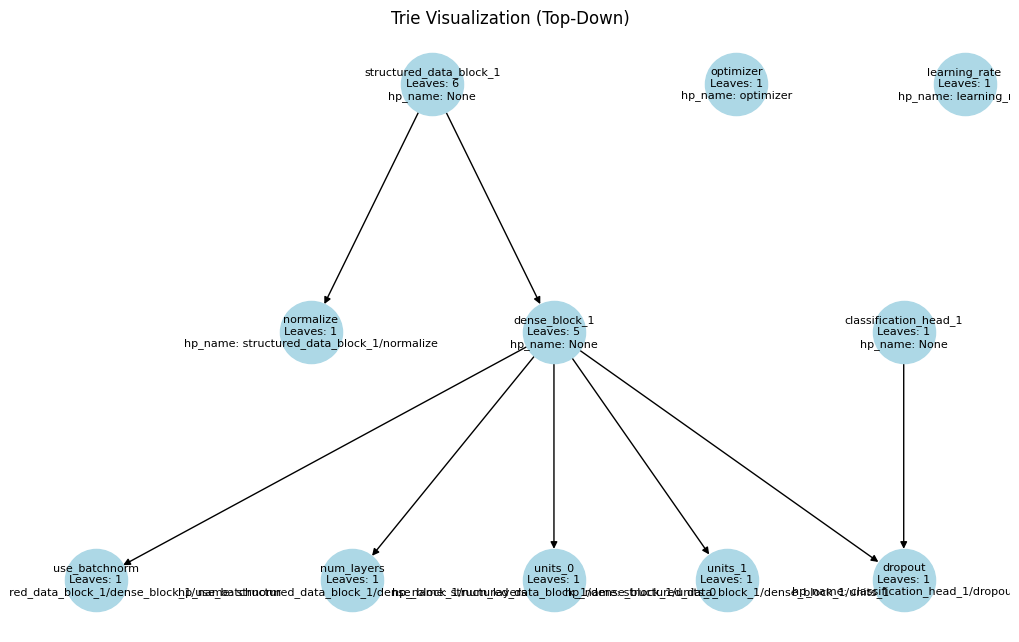

In [10]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Path to your Trie JSON file
json_file_path = "structured_data_classifier/decision_factors_1698258010733.json"

try:
    # Load the Trie JSON data from the file
    with open(json_file_path, "r") as json_file:
        trie_data = json.load(json_file)['trie_json']

    # Function to add nodes and edges to the graph
    def add_nodes(graph, node_data, parent=None):
        for key, value in node_data['children'].items():
            graph.add_node(key, num_leaves=value['num_leaves'], hp_name=value['hp_name'])
            if parent is not None:
                graph.add_edge(parent, key)
            add_nodes(graph, value, key)

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    add_nodes(G, trie_data)

    # Define a custom layout with a top-down orientation
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot", args="-Grankdir=TB")

    # Draw the tree
    plt.figure(figsize=(10, 6))
    labels = {node: f"{node}\nLeaves: {data['num_leaves']}\nhp_name: {data['hp_name']}" for node, data in G.nodes(data=True)}
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="lightblue", font_size=8, font_color="black")
    plt.title("Trie Visualization (Top-Down)")
    plt.show()

except FileNotFoundError:
    print(f"File not found: {json_file_path}")

except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")


In [43]:
json_file_path = "structured_data_classifier/decision_factors_1698258010733.json"
with open(json_file_path, "r") as json_file:
    data = json.load(json_file)
    trie_data = data["trie_json"]

In [44]:
data["hp_names"][0]

'structured_data_block_1/dense_block_1/units_0'

In [52]:
import json
import networkx as nx
import plotly.graph_objects as go

# Load the Trie JSON data from the file
json_file_path = "structured_data_classifier\decision_factors_1698257995198.json"

try:
    with open(json_file_path, "r") as json_file:
        data = json.load(json_file)
        trie_data = data["trie_json"]

    # Function to add nodes and edges to the graph
    def add_nodes(graph, node_data, parent=None):
        for key, value in node_data['children'].items():
            graph.add_node(key, num_leaves=value['num_leaves'], hp_name=value['hp_name'])
            if parent is not None:
                graph.add_edge(parent, key)
            add_nodes(graph, value, key)

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    add_nodes(G, trie_data)

    # Define a custom layout with a top-down orientation
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot", args="-Grankdir=TB")

    # Create a Plotly figure for the Trie visualization
    edge_x = []
    edge_y = []
    labels = {}
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    for node in G.nodes(data=True):
        x, y = pos[node[0]]
        labels[node[0]] = f"{node[0]}<br>Leaves: {node[1]['num_leaves']}<br>hp_name: {node[1]['hp_name']}"

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    node_colors = []  # Store node colors
    hp_names = data.get("hp_names", [])
    for node in pos:
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        # Check if hp_name is similar to any hp_name in hp_names
        if node in data["hp_names"][0]:
            node_colors.append("red")  # Color the node red
        else:
            node_colors.append("lightblue")  # Default color

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=list(labels.values()),
        textposition="bottom center",  # Shift labels below the nodes
        marker=dict(
            showscale=False,
            size=20,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            color=node_colors  # Set node colors
        ))

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=0),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        height=500,
                        width=500))

    # Show the interactive Trie visualization
    fig.show()

except FileNotFoundError:
    print(f"File not found: {json_file_path}")

except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")


In [4]:
from anytree import Node, RenderTree, Walker
import json

# Sample Trie data (replace this with your Trie data)
trie_data = {
    "num_leaves": 9,
    "hp_name": None,
    "children": {
        "structured_data_block_1": {
            "num_leaves": 6,
            "hp_name": None,
            "children": {
                "normalize": {
                    "num_leaves": 1,
                    "hp_name": "structured_data_block_1/normalize",
                    "children": {}
                },
                "dense_block_1": {
                    "num_leaves": 5,
                    "hp_name": None,
                    "children": {
                        "use_batchnorm": {
                            "num_leaves": 1,
                            "hp_name": "structured_data_block_1/dense_block_1/use_batchnorm",
                            "children": {}
                        },
                        "num_layers": {
                            "num_leaves": 1,
                            "hp_name": "structured_data_block_1/dense_block_1/num_layers",
                            "children": {}
                        },
                        "units_0": {
                            "num_leaves": 1,
                            "hp_name": "structured_data_block_1/dense_block_1/units_0",
                            "children": {}
                        },
                        "dropout": {
                            "num_leaves": 1,
                            "hp_name": "structured_data_block_1/dense_block_1/dropout",
                            "children": {}
                        },
                        "units_1": {
                            "num_leaves": 1,
                            "hp_name": "structured_data_block_1/dense_block_1/units_1",
                            "children": {}
                        }
                    }
                }
            }
        },
        "classification_head_1": {
            "num_leaves": 1,
            "hp_name": None,
            "children": {
                "dropout": {
                    "num_leaves": 1,
                    "hp_name": "classification_head_1/dropout",
                    "children": {}
                }
            }
        },
        "optimizer": {
            "num_leaves": 1,
            "hp_name": "optimizer",
            "children": {}
        },
        "learning_rate": {
            "num_leaves": 1,
            "hp_name": "learning_rate",
            "children": {}
        }
    }
}

# Function to create a tree structure from the Trie data
def create_tree(node_data, parent=None):
    name = node_data["hp_name"] if node_data["hp_name"] else node_data["num_leaves"]
    node = Node(name, parent=parent)
    for child_name, child_data in node_data["children"].items():
        create_tree(child_data, parent=node)

# Create the root node
root = Node("Root")

# Create the tree structure
create_tree(trie_data, parent=root)

# Print the tree structure (optional)
for pre, fill, node in RenderTree(root):
    print(f"{pre}{node.name}")

# Export the tree structure to JSON
tree_data = {"name": "Root", "children": []}

def add_node_to_json(node, json_node):
    for child in node.children:
        child_json = {"name": child.name, "children": []}
        json_node["children"].append(child_json)
        add_node_to_json(child, child_json)

add_node_to_json(root, tree_data)

# Save tree data to a JSON file
with open("trie_data.json", "w") as json_file:
    json.dump(tree_data, json_file, indent=2)


Root
└── 9
    ├── 6
    │   ├── structured_data_block_1/normalize
    │   └── 5
    │       ├── structured_data_block_1/dense_block_1/use_batchnorm
    │       ├── structured_data_block_1/dense_block_1/num_layers
    │       ├── structured_data_block_1/dense_block_1/units_0
    │       ├── structured_data_block_1/dense_block_1/dropout
    │       └── structured_data_block_1/dense_block_1/units_1
    ├── 1
    │   └── classification_head_1/dropout
    ├── optimizer
    └── learning_rate


In [10]:
x_test = pd.read_csv(test_file_path)
y_test = x_test.pop("survived")

y_pred = cls_obj.sdc_predict(x_test)

9/9 [==============================] - 0s 5ms/step


In [11]:
y_test = y_test.to_numpy()

In [12]:

y_pred = y_pred.flatten().astype(int)

In [13]:
import plotly.express as px
import numpy as np

# Generate random data
np.random.seed(0)
n = 100
x = np.random.rand(n)
y = np.random.rand(n)

# Create a Plotly scatter plot
fig = px.scatter(x=x, y=y, title='Random Scatter Plot', labels={'x': 'X-axis', 'y': 'Y-axis'})

# Customize the layout
fig.update_layout(
    xaxis=dict(title_text='X-axis Label'),
    yaxis=dict(title_text='Y-axis Label'),
)

# Show the plot
fig.show()

obj = fig.to_json()

In [14]:
obj

'{"data":[{"hovertemplate":"X-axis=%{x}\\u003cbr\\u003eY-axis=%{y}\\u003cextra\\u003e\\u003c\\u002fextra\\u003e","legendgroup":"","marker":{"color":"#636efa","symbol":"circle"},"mode":"markers","name":"","orientation":"v","showlegend":false,"x":[0.5488135039273248,0.7151893663724195,0.6027633760716439,0.5448831829968969,0.4236547993389047,0.6458941130666561,0.4375872112626925,0.8917730007820798,0.9636627605010293,0.3834415188257777,0.7917250380826646,0.5288949197529045,0.5680445610939323,0.925596638292661,0.07103605819788694,0.08712929970154071,0.02021839744032572,0.832619845547938,0.7781567509498505,0.8700121482468192,0.978618342232764,0.7991585642167236,0.46147936225293185,0.7805291762864555,0.11827442586893322,0.6399210213275238,0.1433532874090464,0.9446689170495839,0.5218483217500717,0.4146619399905236,0.26455561210462697,0.7742336894342167,0.45615033221654855,0.5684339488686485,0.018789800436355142,0.6176354970758771,0.6120957227224214,0.6169339968747569,0.9437480785146242,0.68182

In [7]:
import plotly.express as px
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have y_pred and y_test as NumPy arrays or Python lists
# y_pred contains the predicted labels, and y_test contains the true labels

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Example confusion matrix (replace this with your actual confusion matrix)


# Create a list of class labels for the x and y axes
class_labels = ['Positive', 'Negative']
color_scale = ['#B7CEEB', '#8AAAE5', '#5D85E0', '#3E61D4']
# Create a Plotly heatmap
fig = px.imshow(
    conf_matrix,
    x=class_labels,
    y=class_labels,
    labels=dict(x="Predicted", y="True"),
    zmin=0, zmax=100,  # Adjust the zmin and zmax values based on your data
    color_continuous_scale=color_scale,  # You can choose a different color scale
)

# Add labels to the cells
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        fig.add_annotation(
            x=class_labels[i],
            y=class_labels[j],
            text=str(conf_matrix[i, j]),
            showarrow=False
        )

# Customize the layout
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted",
    yaxis_title="True",
    width=400,
    height=400
)

# Show the plot
fig.show()




NameError: name 'y_test' is not defined

In [44]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Create a Plotly figure for the precision-recall curve with enhanced styling
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=recall, y=precision,
    mode='lines',
    name='Precision-Recall Curve',
    line=dict(color='royalblue', width=2),
    marker=dict(size=8, symbol='circle', color='royalblue')
))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    title='Precision-Recall Curve',
    showlegend=False,
    plot_bgcolor='white',
    font=dict(family='Arial', size=12, color='black'),
    title_font=dict(size=16, color='black'),
    xaxis=dict(showline=True, linecolor='black', linewidth=2, mirror=True),
    yaxis=dict(showline=True, linecolor='black', linewidth=2, mirror=True),
    legend=dict(x=0.05, y=0.95),
)

# Highlight the point with maximum F1 score
max_f1 = 2 * (precision * recall) / (precision + recall)
max_f1_threshold = thresholds[max_f1.argmax()]
fig.add_shape(type='line', x0=max_f1_threshold, x1=max_f1_threshold, y0=0, y1=1, line=dict(color='red', width=2, dash='dash'))
fig.add_annotation(text=f'Max F1 ({max_f1.max():.2f})', x=max_f1_threshold, y=0.6, showarrow=False, font=dict(color='red'))

# Show the plot
fig.show()

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate=False)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Create a Plotly figure for the ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve (AUC = {:.2f})'.format(roc_auc)))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title='Receiver Operating Characteristic (ROC) Curve',
    showlegend=True,
    legend=dict(x=0.01, y=0.99),
)

# Show the plot
fig.show()


In [49]:

thresholds

array([2, 1, 0])

In [ ]:
# predicted_y = cls_obj.sdc_predict(x_test.iloc[0:10,:])
# print(predicted_y)
# Evaluate the best model with testing data.
print(cls_obj.sdc_evaluate(test_file_path, "survived"))

9/9 [==============================] - 3s 50ms/step - loss: 0.4463 - accuracy: 0.7879
[0.44625693559646606, 0.7878788113594055]


In [ ]:
print(cls_obj.sdc_predict(x_train))

20/20 [==============================] - 0s 6ms/step
[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]

In [ ]:
import tensorflow as tf
log_dir = "logs/0/execution0/train"  # Replace with your log directory

file_pattern = f"{log_dir}/events.out.tfevents.*"
dataset = tf.data.TFRecordDataset(tf.data.Dataset.list_files(file_pattern), compression_type="GZIP")


In [ ]:
for raw_record in dataset:
    event = tf.compat.v1.Event.FromString(raw_record.numpy())
    print(event)
    for value in event.summary.value:
        tag = value.tag
        tensor_proto = value.tensor
        print(tag,tensor_proto)
        # Process the summary data as needed

DataLossError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} inflate() failed with error -3: incorrect header check [Op:IteratorGetNext]

In [ ]:
model = cls_obj.clk.export_model()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 9)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

#### Read and prepreocess Test File 

In [ ]:
x_test = pd.read_csv(test_file_path)
y_test = x_test["survived"]
x_test = x_test.drop(["survived"], axis=1)

input_data = np.array(x_test.iloc[1,:]).tolist()
explain_data = np.array(x_test.iloc[1,:])

input_data

['male', 54.0, 0, 0, 51.8625, 'First', 'E', 'Southampton', 'y']

#### Disect the model

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
# Splitting the model into two parts 
# 1. Preprocessing model for calculating the preprocessed features
# takes list as input
preprocessing_model = Model(inputs=model.input, outputs=model.layers[2].output)  

output = preprocessing_model.predict(input_data)
output

1/1 [==============================] - 0s 266ms/step


array([[-0.7275079 ,  1.9492092 , -0.47423774, -0.4790527 ,  0.32036227,
         0.43003452,  1.72216   , -0.57665044, -0.8279398 ]],
      dtype=float32)

In [ ]:
for layer in model.layers:
    print(layer)
    if hasattr(layer, 'weights'):
        weights = layer.get_weights()  # Returns a list of numpy arrays
        print(f"Weights of {layer.name}:")
        for weight_array in weights:
            k = weight_array
            print(weight_array.shape)
            print(weight_array)

Weights of input_1:
Weights of multi_category_encoding:
(2,)
[b'male' b'female']
(3,)
[b'Third' b'First' b'Second']
(8,)
[b'unknown' b'C' b'B' b'E' b'D' b'A' b'F' b'G']
(4,)
[b'Southampton' b'Cherbourg' b'Queenstown' b'unknown']
(2,)
[b'y' b'n']
Weights of normalization:
(9,)
[ 1.3460923  29.631308    0.5454546   0.37958536 34.3854      1.6586922
  1.6267942   1.3700157   1.4066987 ]
(9,)
[2.2631252e-01 1.5629588e+02 1.3228940e+00 6.2784487e-01 2.9761584e+03
 6.2992042e-01 1.8989949e+00 4.1173252e-01 2.4129483e-01]
()
627
Weights of dense:
(9, 32)
[[ 3.73717636e-01  2.42761020e-02 -3.81686896e-01 -1.87628552e-01
   9.55337062e-02  1.80165797e-01 -2.73672283e-01  2.95524687e-01
   1.69859733e-02  9.10211653e-02 -3.36258143e-01 -2.93575674e-01
   3.20210099e-01 -2.06718698e-01  4.31745648e-02  1.08306527e-01
  -2.26568192e-01 -1.20298237e-01 -3.77664000e-01  7.15409988e-05
   3.00633132e-01 -1.20777749e-01 -5.77410199e-02  2.76666433e-02
  -3.91366154e-01  2.86004186e-04  8.51521716e-02 

In [ ]:
# 2. Actual Dense model
dense_model = Model(inputs=model.layers[3].input, outputs=model.output) 

final_output = dense_model.predict(output)
final_output

1/1 [==============================] - 0s 61ms/step


array([[0.39963502]], dtype=float32)

In [ ]:
#Predictions from the model
# original model uses np array as input
predictions = cls_obj.sdc_predict(explain_data)
print(predictions)
pred = [int(i[0]) for i in predictions]
pred

1/1 [==============================] - 0s 11ms/step
[[0.]]


[0]

In [ ]:
#PLotting helper function

import matplotlib.pyplot as plt
def plot_importance(feat_imp, feat_names, class_idx, **kwargs):
    """
    Create a horizontal barchart of feature effects, sorted by their magnitude.
    """
    df = pd.DataFrame(data=feat_imp, columns=feat_names).sort_values(by=0, axis='columns')
    feat_imp, feat_names = df.values[0], df.columns
    print(feat_imp, feat_names)
    fig, ax = plt.subplots(figsize=(10, 5))
    y_pos = np.arange(len(feat_imp))
    ax.barh(y_pos, feat_imp)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feat_names, fontsize=15)
    ax.invert_yaxis()
    ax.set_xlabel(f'Feature effects for class {class_idx}', fontsize=15)
    ax.set_title(f'What does each features contribute to the model prediction?', fontsize=18)
    return ax, fig

In [ ]:
import plotly.graph_objects as go

def plot_importance(feat_imp, feat_names, class_idx):
    """
    Create a horizontal bar chart of feature effects, sorted by their magnitude.
    """
    # Sort feature importance and feature names

    df = pd.DataFrame(data=feat_imp, columns=feat_names).sort_values(by=0, axis='columns')
    feat_imp, feat_names = df.values[0], df.columns

    # Create a horizontal bar chart
    fig = go.Figure(go.Bar(
        x=feat_imp,
        y=feat_names,
        orientation='h',
    ))

    # Customize the layout
    fig.update_layout(
        title=f'What does each feature contribute to the model prediction?',
        xaxis_title=f'Feature effects for class {class_idx}',
        yaxis=dict(tickfont=dict(size=15)),
        xaxis=dict(titlefont=dict(size=15)),
        title_font=dict(size=18),
        height=500,  # Adjust the height as needed
        width=800,   # Adjust the width as needed
    )

    return fig


In [ ]:
output

array([[-0.7275079 ,  1.9492092 , -0.47423774, -0.4790527 ,  0.32036227,
         0.43003452,  1.72216   , -0.57665044, -0.8279398 ]],
      dtype=float32)

In [ ]:

from functools import partial

def round_value(x):
    return np.where(x>0.5,1.0,0.0)[0]


target_fn = partial(round_value)


In [ ]:
target_fn(np.array([0.1]))

0.0

In [ ]:
dense_model.layers

In [ ]:
#Integrated gradients- What/How much does each feature contribute to the model prediction?
#INFO: It works on instance basis
# Give integrated gradients for different instances 
from alibi.explainers import IntegratedGradients
ig  = IntegratedGradients(dense_model, n_steps=100, target_fn=target_fn )

explanation = ig.explain(output)
attributions = explanation.data['attributions'][0]
# Print or analyze the attribution scores as needed
print(attributions)


pred_class = '"did_not_survive"' if pred[0] == 0 else '"survived"'
plot_importance(attributions, x_test.columns, pred_class)

c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\alibi\explainers\integrated_gradients.py:665: UserWarning: Predictions from the model are scalar valued but `target_fn` was passed. `target_fn` is not necessarywhen predictions are scalar valued already. Using `target_fn` here may result in unexpected behaviour.
  warnings.warn(msg)


[[ 0.20139542  0.05528651 -0.00971699  0.01391829 -0.05752408 -0.03256246
  -0.1299155   0.02344999 -0.02580418]]


In [ ]:
explanation

Explanation(meta={
  'name': 'IntegratedGradients',
  'type': ['whitebox'],
  'explanations': ['local'],
  'params': {
              'target_fn': functools.partial(<function round_value at 0x000001A86ABC4430>),
              'method': 'gausslegendre',
              'n_steps': 100,
              'internal_batch_size': 100,
              'layer': 'unspecified'}
            ,
  'version': '0.9.5dev'}
, data={
  'attributions': [array([[ 0.20139542,  0.05528651, -0.00971699,  0.01391829, -0.05752408,
        -0.03256246, -0.1299155 ,  0.02344999, -0.02580418]])],
  'X': array([[-0.7275079 ,  1.9492092 , -0.47423774, -0.4790527 ,  0.32036227,
         0.43003452,  1.72216   , -0.57665044, -0.8279398 ]],
      dtype=float32),
  'forward_kwargs': {},
  'baselines': array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
  'predictions': array([[0.39657673]], dtype=float32),
  'deltas': array([0.07710098]),
  'target': array([0])}
)

In [ ]:
model.layers[-1].name

'classification_head_1'

In [ ]:
X_train = pd.read_csv(train_file_path)
Y_train = X_train["survived"]
X_train = X_train.drop(["survived"], axis=1)

In [ ]:
X_train.columns

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [ ]:
X_train_list = X_train.to_numpy().tolist()


In [ ]:
model.predict(X_train_list)[0]

20/20 [==============================] - 0s 4ms/step


array([0.29730213], dtype=float32)

In [ ]:
pred(X_train_list)

UnimplementedError: Graph execution error:

Detected at node 'model_4/Cast' defined at (most recent call last):
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_15748\3338229845.py", line 1, in <module>
      pred(X_train_list)
    File "C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_15748\2363376541.py", line 9, in pred
      predictions = dense_model.predict(x)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\functional.py", line 649, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "c:\Users\Deepanshu\anaconda3\envs\automl\lib\site-packages\keras\engine\functional.py", line 761, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'model_4/Cast'
Cast string to float is not supported
	 [[{{node model_4/Cast}}]] [Op:__inference_predict_function_17653]

In [ ]:
import requests
import json
FLASK_API_URL = "http://127.0.0.1:8082/update_data"
trial_info = {}

import requests
def publish_data(message_data): 
        response = requests.post("http://127.0.0.1:8082/update_data", json=message_data)
        if response.status_code == 200:
            print("Data sent successfully")
        else:
            print(f"Failed to send data: {response.status_code}")
            
file_path = "D:\\Courses\\Master_Thesis\\automl_exp\\MT_Code\\structured_data_classifier\\trial_1\\trial_mid1697228362494.json"
try:
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
    trial_info["values"] = data["hyperparameters"]["values"]
    trial_info["metrics"] = data["metrics"]

    publish_data(trial_info)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except json.JSONDecodeError as e:
    print.info(f"Error decoding JSON: {e}")

In [ ]:
X_train.columns

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [ ]:
int_cols = []
cat_cols = []
for col_name in X_train.columns:
    p = X_train[col_name].unique()
    if len(p) <10:
        cat_cols.append(col_name)
    else:
        int_cols.append(col_name)


In [ ]:
cat_cols

['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']

In [ ]:
int_cols

['age', 'fare']

In [ ]:
model.predict(X_train.to_numpy().tolist())

20/20 [==============================] - 0s 3ms/step


array([[0.29730213],
       [0.6309502 ],
       [0.50603414],
       [0.6171465 ],
       [0.3043869 ],
       [0.26763704],
       [0.56068474],
       [0.6808124 ],
       [0.61030203],
       [0.34259176],
       [0.33569488],
       [0.5070682 ],
       [0.22245228],
       [0.31291944],
       [0.5323773 ],
       [0.5185246 ],
       [0.31241682],
       [0.5109712 ],
       [0.5408962 ],
       [0.32321888],
       [0.34049588],
       [0.5391324 ],
       [0.3486315 ],
       [0.33101523],
       [0.6607561 ],
       [0.53905004],
       [0.24028134],
       [0.41016093],
       [0.27959135],
       [0.32321975],
       [0.5795062 ],
       [0.5165652 ],
       [0.6037604 ],
       [0.32334736],
       [0.6795622 ],
       [0.3487183 ],
       [0.31243518],
       [0.25969344],
       [0.54705393],
       [0.26283032],
       [0.6140064 ],
       [0.6086976 ],
       [0.34188527],
       [0.4187793 ],
       [0.56295085],
       [0.32347804],
       [0.21023288],
       [0.320

In [ ]:
x_test

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...
259,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


9/9 [==============================] - 0s 1ms/step


array([[<Axes: xlabel='fare', ylabel='ALE'>]], dtype=object)

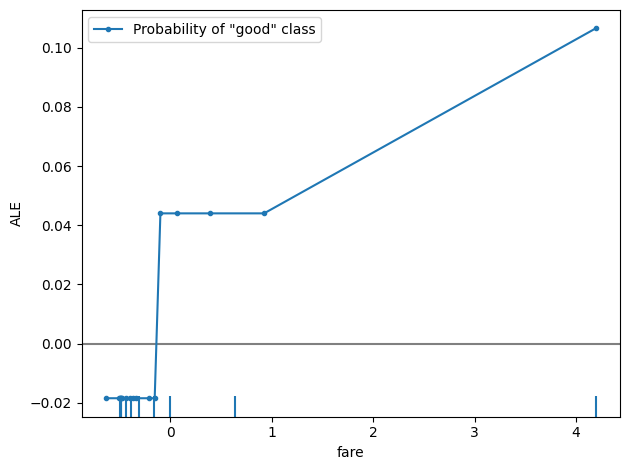

In [ ]:
#Accumulated Local Effects- How does model prediction vary with respect to features of interest?
#INFO: It works on numerical featues
# Gives ALE for different numerical features
# ALE should be wrt to a class good/bad 
#TODO: change the pred() funtion to give output wrt to a specific
from alibi.explainers import ALE, plot_ale

def pred(x):
    predictions = dense_model.predict(x)
    final_predictions = (predictions > 0.5).astype(int)
    return final_predictions

# Model is a binary classifier so we only take the first model output corresponding to "good" class probability.
output = preprocessing_model.predict(x_test.to_numpy().tolist())
ale = ALE(pred, feature_names=x_test.columns)
exp = ale.explain(output)

plot_ale(exp, features=['fare'], line_kw={'label': 'Probability of "good" class'})

In [ ]:
exp

Explanation(meta={
  'name': 'ALE',
  'type': ['blackbox'],
  'explanations': ['global'],
  'params': {
              'check_feature_resolution': True,
              'low_resolution_threshold': 10,
              'extrapolate_constant': True,
              'extrapolate_constant_perc': 10.0,
              'extrapolate_constant_min': 0.1,
              'min_bin_points': 4}
            ,
  'version': '0.9.5dev'}
, data={
  'ale_values': [array([[-0.3844697],
       [ 0.3844697]]), array([[ 0.09030032],
       [ 0.09030032],
       [ 0.09030032],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [ 0.01887175],
       [-0.10612825],
       [-0.19703734],
       [-0.19703734],
       [-0.19703734]]), array([[ 0.07503444],
       [-0

In [ ]:
anchor_pred(X_train.iloc[1,:].to_numpy().tolist())

1/1 [==============================] - 0s 37ms/step


array([[1]])

In [ ]:
X_train.iloc[1,:].to_numpy().tolist()

['female', 38.0, 1, 0, 71.2833, 'First', 'C', 'Cherbourg', 'n']

In [ ]:
list(X_train.columns)

['sex',
 'age',
 'n_siblings_spouses',
 'parch',
 'fare',
 'class',
 'deck',
 'embark_town',
 'alone']

In [ ]:
def anchor_pred(x):
    print(x)
    predictions = dense_model.predict(x)
    final_predictions = (predictions > 0.5).astype(int)
    return final_predictions

In [ ]:
from alibi.explainers import AnchorTabular

predict_fn = anchor_pred
explainer = AnchorTabular(predict_fn, list(X_train.columns))
explainer.fit(output)

# x is the instance to explain
result = explainer.explain(output)

print('Anchor =', result.data['anchor'])
print('Coverage = ', result.data['coverage'])

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 45ms/step
[[-0.7275079   0.42943236 -0.5136258  -0.48401728 -0.48273844 -0.82992667
  -0.45484465 -0.57665044 -0.8279398 ]]
1/1 [==============================] - 0s 37ms/step
[[ 1.3745551e+00  7.4938542e-01  4.7423756e-01  8.0190986e-01
   1.4022372e+00  4.3003452e-01  2.7082357e-01  9.8179793e-01
   1.2078174e+00]
 [ 1.3745551e+00  7.4938542e-01  4.7423756e-01 -4.8401728e-01
   3.9437130e-01  4.3003452e-01  1.7221600e+00 -5.7665044e-01
   1.2078174e+00]
 [-7.2750789e-01 -7.7039152e-01 -5.1362580e-01 -4.8401728e-01
  -5.5674738e-01 -8.2992667e-01 -4.5484465e-01  9.8179793e-01
  -8.2793981e-01]
 [-7.2750789e-01  2.9491063e-02 -5.1362580e-01 -4.8401728e-01
  -4.5615935e-01 -8.2992667e-01 -4.5484465e-01 -5.7665044e-01
  -8.2793981e-01]
 [ 1.3745551e+00 -6.9040328e-01  4.7423756e-01 -4.8401728e-01
  -4.5020196e-01 -8.2992667e-01 -4.5484465e-01 -5.7665044e-01
   1.2078174e+00]
 [ 1.3745551e+00 -1.3048546e-01 -5.136258

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
for layer in model.layers:
    print(layer)
    if hasattr(layer, 'weights'):
        weights = layer.get_weights()  # Returns a list of numpy arrays
        print(f"Weights of {layer.name}:")
        for weight_array in weights:
            k = weight_array
            print(weight_array.shape)
            print(weight_array)

Weights of input_1:
Weights of multi_category_encoding:
(2,)
[b'male' b'female']
(7,)
[b'0' b'1' b'2' b'4' b'3' b'8' b'5']
(6,)
[b'0' b'1' b'2' b'5' b'4' b'3']
(3,)
[b'Third' b'First' b'Second']
(8,)
[b'unknown' b'C' b'B' b'E' b'D' b'A' b'F' b'G']
(4,)
[b'Southampton' b'Cherbourg' b'Queenstown' b'unknown']
(2,)
[b'y' b'n']
Weights of normalization:
(9,)
[ 1.3460923 29.631308   1.5199361  1.3763956 34.3854     1.6586922
  1.6267942  1.3700157  1.4066987]
(9,)
[2.2631252e-01 1.5629588e+02 1.0247223e+00 6.0473800e-01 2.9761584e+03
 6.2992042e-01 1.8989949e+00 4.1173252e-01 2.4129483e-01]
()
627
Weights of dense:
(9, 32)
[[ 1.0576434  -0.35929665 -1.2357174   0.47566906 -0.02816359  2.6433935
  -0.14225444 -0.33795315  1.1293479   2.089843   -0.5029013  -1.3011488
   1.4498525  -0.7511772   0.4753492   0.30278692 -0.636578    0.730574
  -0.68008864  1.0636848  -0.51590735  0.05025548 -0.28250653  1.4780889
   0.21208972  0.2892703   0.6289771   0.7288685  -0.38018528  0.4639636
   0.016160

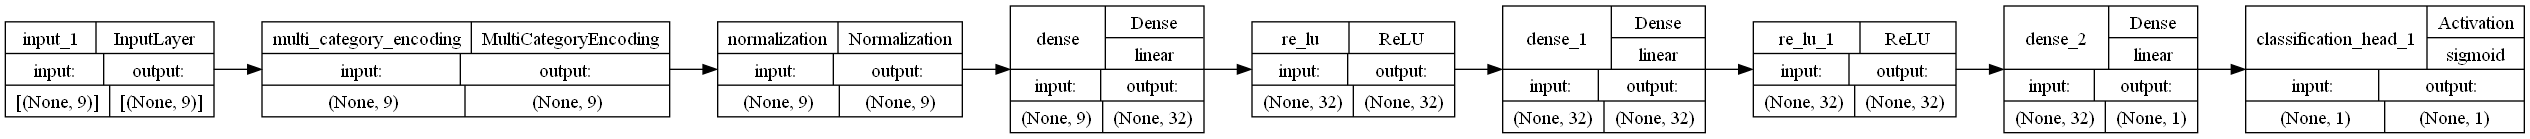

In [ ]:
from keras.utils import vis_utils
vis_utils.plot_model(model, to_file='test_model.png', show_shapes=True, show_layer_names=True,rankdir='LR', expand_nested=True, show_layer_activations=True )

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

import autokeras as ak


In [ ]:
house_dataset = fetch_california_housing()
df = pd.DataFrame(
    np.concatenate(
        (house_dataset.data, house_dataset.target.reshape(-1, 1)), axis=1
    ),
    columns=house_dataset.feature_names + ["Price"],
)
train_size = int(df.shape[0] * 0.9)
df[:train_size].to_csv("train.csv", index=False)
df[train_size:].to_csv("eval.csv", index=False)
train_file_path = "train.csv"
test_file_path = "eval.csv"


In [ ]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data regressor with training data.
reg.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    "Price",
    epochs=100,
)
# Predict with the best model.
predicted_y = reg.predict(test_file_path)
# Evaluate the best model with testing data.
print(reg.evaluate(test_file_path, "Price"))


Trial 3 Complete [00h 00m 40s]
val_loss: 0.8961352705955505

Best val_loss So Far: 0.8961352705955505
Total elapsed time: 00h 02m 13s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
581/581 [==============================] - 2s 2ms/step - loss: 4.9231 - mean_squared_error: 4.9231
Epoch 2/100
581/581 [==============================] - 2s 3ms/step - loss: 1.9850 - mean_squared_error: 1.9850
Epoch 3/100
581/581 [==============================] - 1s 2ms/step - loss: 0.9098 - mean_squared_error: 0.9098
Epoch 4/100
581/581 [==============================] - 1s 3ms/step - loss: 0.7267 - mean_squared_error: 0.7267
Epoch 5/100
581/581 [==============================] - 1s 2ms/step - loss: 0.6274 - mean_squared_error: 0.6274
Epoch 6/100
581/581 [==============================] - 1s 3ms/step - loss: 0.5718 - mean_squared_error: 0.5718
Epoch 7/100
581/581 [==============================] - 1s 2ms/step - loss: 0.5442 - mean_squared_error: 0.5442
Epoch 8/100
581/581 [==============================

INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


65/65 [==============================] - 0s 2ms/step - loss: 0.3505 - mean_squared_error: 0.3505
[0.3504956066608429, 0.3504956066608429]


In [ ]:
reg_model = reg.export_model()

In [ ]:
reg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 8)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import autokeras as ak


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)


(60000, 28, 28)
(60000,)
[5 0 4]


In [ ]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=10)


# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))


Trial 1 Complete [00h 16m 21s]
val_loss: 0.03539927676320076

Best val_loss So Far: 0.03539927676320076
Total elapsed time: 00h 16m 21s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/10
1875/1875 [==============================] - 103s 54ms/step - loss: 0.1650 - accuracy: 0.9503
Epoch 2/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0755 - accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0617 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0538 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0463 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0396 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0388 - accuracy: 0.9871
Epoch 8/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0343 - accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 10/10
1875/1875 [==============================] 

INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


313/313 [==============================] - 4s 13ms/step
[['7']
 ['2']
 ['1']
 ...
 ['4']
 ['5']
 ['6']]
313/313 [==============================] - 4s 13ms/step - loss: 0.0391 - accuracy: 0.9878
[0.03907911479473114, 0.9878000020980835]


In [ ]:
# INPUT NODES
'''ImageInput
    Input
    StructuredDataInput
    TextInput'''

# Types of block
'''ConvBlock
    DenseBlock
    Embedding
    Merge
    ResNetBlock
    RNNBlock
    SpatialReduction
    TemporalReduction
    XceptionBlock
    ImageBlock
    StructuredDataBlock
    TextBlock
    ImageAugmentation
    Normalization
    TextToIntSequence
    TextToNgramVector
    CategoricalToNumerical
    ClassificationHead
    RegressionHead'''

# Utilities
'''
    image_dataset_from_directory
    text_dataset_from_directory
'''

In [ ]:
import json

# Open the JSON file for reading
with open('D:\\Courses\\Master_Thesis\\automl_exp\\MT_Code\\structured_data_classifier\\trial_0\\trial_mid1695578881179.json', 'r') as file:
    # Use json.load() to parse the JSON data
    data = json.load(file)

# Now, 'data' contains the parsed JSON data as a Python dictionary or list


In [ ]:
data

{'trial_id': '0',
 'hyperparameters': {'space': [{'class_name': 'Boolean',
    'config': {'name': 'structured_data_block_1/normalize',
     'default': False,
     'conditions': []}},
   {'class_name': 'Boolean',
    'config': {'name': 'structured_data_block_1/dense_block_1/use_batchnorm',
     'default': False,
     'conditions': []}},
   {'class_name': 'Choice',
    'config': {'name': 'structured_data_block_1/dense_block_1/num_layers',
     'default': 2,
     'conditions': [],
     'values': [1, 2, 3],
     'ordered': True}},
   {'class_name': 'Choice',
    'config': {'name': 'structured_data_block_1/dense_block_1/units_0',
     'default': 32,
     'conditions': [],
     'values': [16, 32, 64, 128, 256, 512, 1024],
     'ordered': True}},
   {'class_name': 'Choice',
    'config': {'name': 'structured_data_block_1/dense_block_1/dropout',
     'default': 0.0,
     'conditions': [],
     'values': [0.0, 0.25, 0.5],
     'ordered': True}},
   {'class_name': 'Choice',
    'config': {'name'